-----------------------------------------------
# <font color='red'>Solar Radiation Prediction</font>
### The Data used here can be found through  <a href="https://www.kaggle.com/dronio/SolarEnergy#" target="_blank">`This Link`</a>.
-----------------------------------------------
-----------------------------------------------

## <font color='green'>Description of This File</font> 

### The dataset contains such columns as: `wind direction`, `wind speed`, `humidity` and `temperature`. 

### The response parameter that is to be predicted is: `Solar_radiation`. 
#### It contains measurements for the past 4 months and you have to `predict the level of solar radiation`.

## `Just imagine that you've got solar energy batteries and you want to know will it be reasonable to use them in future?`



#### The best result of accuracy I could get using cross-validation was only 55%.
------------------
------------------

##  <font color='green'>About This File</font>


#### These datasets are meteorological data from the `HI-SEAS weather station` from `four months` (September through December 2016) between Mission IV and Mission V.

### For each dataset, the fields are:

- A row number (1-n) useful in sorting this export's results
- The `UNIX time_t` date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
- The date in yyyy-mm-dd format
- The local time of day in hh:mm:ss 24-hour format
- The numeric data, if any (may be an empty string)
- The text data, if any (may be an empty string)

### <font color='red'>The units of each dataset are</font>:

- `Solar radiation`: watts per meter^2

- `Temperature`: degrees Fahrenheit

- `Humidity`: percent

- `Barometric pressure`: Hg

- `Wind direction`: degrees

- `Wind speed`: miles per hour

- `Sunrise/sunset`: Hawaii time

## - `'Solar radiation'`: The target variable. 

_______________________________________
## `What is a Unix Timestamp`?

- Simply put, `the Unix timestamp` is a way to track time as a running total of seconds. This count starts at `the Unix Epoch` on `January 1st, 1970` at UTC. 

- Therefore, the `Unix timestamp` is merely the number of seconds between a particular date and the Unix Epoch. 

- It should also be pointed out that this point in time technically does not change no matter where you are located on the globe. 

- This is very useful to computer systems for tracking and sorting dated information in dynamic and distributed applications both online and client side. 

- The reason why Unix timestamps are used by many webmasters is because `they can represent all time zones at once`. 

# 1. Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datasist as ds
import warnings
from pytz import timezone
import pytz
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [20, 12]}, font_scale=1.2)

# 2. Load Data

In [2]:
df= pd.read_csv('SolarPrediction.csv')
df=df.sort_values(['UNIXTime'], ascending = [True])
df

UNIXTime                    Data      Time  Radiation  Temperature  \
7416   1472724008    9/1/2016 12:00:00 AM  00:00:08       2.58           51   
7415   1472724310    9/1/2016 12:00:00 AM  00:05:10       2.83           51   
7414   1472725206    9/1/2016 12:00:00 AM  00:20:06       2.16           51   
7413   1472725505    9/1/2016 12:00:00 AM  00:25:05       2.21           51   
7412   1472725809    9/1/2016 12:00:00 AM  00:30:09       2.25           51   
...           ...                     ...       ...        ...          ...   
24526  1483263302  12/31/2016 12:00:00 AM  23:35:02       1.22           41   
24525  1483263601  12/31/2016 12:00:00 AM  23:40:01       1.21           41   
24524  1483263904  12/31/2016 12:00:00 AM  23:45:04       1.21           42   
24523  1483264203  12/31/2016 12:00:00 AM  23:50:03       1.19           41   
24522  1483264501  12/31/2016 12:00:00 AM  23:55:01       1.21           41   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
7416      30.43       103                   77.27  11.25    06:07:00   
7415      30.43       103                  153.44   9.00    06:07:00   
7414      30.43       103                  142.04   7.87    06:07:00   
7413      30.43       103                  144.12  18.00    06:07:00   
7412      30.43       103                   67.42  11.25    06:07:00   
...         ...       ...                     ...    ...         ...   
24526     30.34        83                  238.94   6.75    06:57:00   
24525     30.34        82                  236.79   5.62    06:57:00   
24524     30.34        81                  218.28   7.87    06:57:00   
24523     30.34        80                  215.23   7.87    06:57:00   
24522     30.34        81                  215.56   9.00    06:57:00   

      TimeSunSet  
7416    18:38:00  
7415    18:38:00  
7414    18:38:00  
7413    18:38:00  
7412    18:38:00  
...          ...  
24526   17:54:00  
24525   17:54:00  
24524   17:54:00  
24523   17:54:00  
24522   17:54:00  

[32686 rows x 11 columns]

In [3]:
df.reset_index(inplace = True, drop = True) 
df

UNIXTime                    Data      Time  Radiation  Temperature  \
0      1472724008    9/1/2016 12:00:00 AM  00:00:08       2.58           51   
1      1472724310    9/1/2016 12:00:00 AM  00:05:10       2.83           51   
2      1472725206    9/1/2016 12:00:00 AM  00:20:06       2.16           51   
3      1472725505    9/1/2016 12:00:00 AM  00:25:05       2.21           51   
4      1472725809    9/1/2016 12:00:00 AM  00:30:09       2.25           51   
...           ...                     ...       ...        ...          ...   
32681  1483263302  12/31/2016 12:00:00 AM  23:35:02       1.22           41   
32682  1483263601  12/31/2016 12:00:00 AM  23:40:01       1.21           41   
32683  1483263904  12/31/2016 12:00:00 AM  23:45:04       1.21           42   
32684  1483264203  12/31/2016 12:00:00 AM  23:50:03       1.19           41   
32685  1483264501  12/31/2016 12:00:00 AM  23:55:01       1.21           41   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         30.43       103                   77.27  11.25    06:07:00   
1         30.43       103                  153.44   9.00    06:07:00   
2         30.43       103                  142.04   7.87    06:07:00   
3         30.43       103                  144.12  18.00    06:07:00   
4         30.43       103                   67.42  11.25    06:07:00   
...         ...       ...                     ...    ...         ...   
32681     30.34        83                  238.94   6.75    06:57:00   
32682     30.34        82                  236.79   5.62    06:57:00   
32683     30.34        81                  218.28   7.87    06:57:00   
32684     30.34        80                  215.23   7.87    06:57:00   
32685     30.34        81                  215.56   9.00    06:57:00   

      TimeSunSet  
0       18:38:00  
1       18:38:00  
2       18:38:00  
3       18:38:00  
4       18:38:00  
...          ...  
32681   17:54:00  
32682   17:54:00  
32683   17:54:00  
32684   17:54:00  
32685   17:54:00  

[32686 rows x 11 columns]

In [4]:
# Visualize the data dtype and missing data from columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
# See the value counts of all columns to see if coulmns have a non_valid values..
for col in df.columns:
    print(col+ '\n------------')
    print(df[col].value_counts())
    print('------------'*2)

UNIXTime
------------
1474408504    1
1473058504    1
1482284721    1
1477168819    1
1475018421    1
             ..
1478884202    1
1473235820    1
1482776139    1
1473696623    1
1473839104    1
Name: UNIXTime, Length: 32686, dtype: int64
------------------------
Data
------------
11/6/2016 12:00:00 AM     288
12/25/2016 12:00:00 AM    288
10/19/2016 12:00:00 AM    288
11/18/2016 12:00:00 AM    288
11/9/2016 12:00:00 AM     288
                         ... 
9/16/2016 12:00:00 AM     185
12/8/2016 12:00:00 AM     154
9/8/2016 12:00:00 AM      142
9/15/2016 12:00:00 AM     140
9/9/2016 12:00:00 AM      123
Name: Data, Length: 118, dtype: int64
------------------------
Time
------------
16:20:18    24
15:45:18    21
19:20:18    21
20:05:18    21
18:45:18    21
            ..
03:10:28     1
13:40:28     1
16:55:41     1
17:50:39     1
09:21:06     1
Name: Time, Length: 8299, dtype: int64
------------------------
Radiation
------------
1.22      2264
1.23      2110
1.21      2010
1.24   

In [6]:
# Describe the data to intially determine the outliers..
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%                147.700000      5.620000  
75%                179.310000      7.870000  
max                359.950000     40.500000

## `Working With UNIXTime`

In [7]:
hawaii= timezone('Pacific/Honolulu')
utc_time = pytz.utc

#We use df.index because z_localize/tz_convert act on the INDEX of the object, not on the values. 
#Easiest to simply turn it into an index then localize and convert.
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')
df.index = df.index.tz_localize(utc_time).tz_convert(hawaii)


#Create New Column from The Index 
df['New_UNIXTime'] = df.index 


#Reset The Index
df.reset_index(inplace = True, drop = True) 


#Reordered The Columns for good Visualization
df=df[['UNIXTime','New_UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet']]


#Show Sample of the Data
df.sample(50)


UNIXTime              New_UNIXTime                    Data      Time  \
18973  1478816401 2016-11-10 12:20:01-10:00  11/10/2016 12:00:00 AM  12:20:01   
18562  1478693102 2016-11-09 02:05:02-10:00   11/9/2016 12:00:00 AM  02:05:02   
14684  1477527318 2016-10-26 14:15:18-10:00  10/26/2016 12:00:00 AM  14:15:18   
16890  1478190921 2016-11-03 06:35:21-10:00   11/3/2016 12:00:00 AM  06:35:21   
7158   1475151323 2016-09-29 02:15:23-10:00   9/29/2016 12:00:00 AM  02:15:23   
24951  1480715108 2016-12-02 11:45:08-10:00   12/2/2016 12:00:00 AM  11:45:08   
20686  1479330602 2016-11-16 11:10:02-10:00  11/16/2016 12:00:00 AM  11:10:02   
4556   1474351504 2016-09-19 20:05:04-10:00   9/19/2016 12:00:00 AM  20:05:04   
7187   1475160021 2016-09-29 04:40:21-10:00   9/29/2016 12:00:00 AM  04:40:21   
19797  1479063601 2016-11-13 09:00:01-10:00  11/13/2016 12:00:00 AM  09:00:01   
10502  1476260421 2016-10-11 22:20:21-10:00  10/11/2016 12:00:00 AM  22:20:21   
13064  1477039518 2016-10-20 22:45:18-10:00  10/20/2016 12:00:00 AM  22:45:18   
31360  1482865850 2016-12-27 09:10:50-10:00  12/27/2016 12:00:00 AM  09:10:50   
1840   1473323723 2016-09-07 22:35:23-10:00    9/7/2016 12:00:00 AM  22:35:23   
29852  1482413139 2016-12-22 03:25:39-10:00  12/22/2016 12:00:00 AM  03:25:39   
14944  1477605619 2016-10-27 12:00:19-10:00  10/27/2016 12:00:00 AM  12:00:19   
41     1472737804 2016-09-01 03:50:04-10:00    9/1/2016 12:00:00 AM  03:50:04   
7333   1475204424 2016-09-29 17:00:24-10:00   9/29/2016 12:00:00 AM  17:00:24   
13256  1477097118 2016-10-21 14:45:18-10:00  10/21/2016 12:00:00 AM  14:45:18   
6566   1474969526 2016-09-26 23:45:26-10:00   9/26/2016 12:00:00 AM  23:45:26   
1958   1473402921 2016-09-08 20:35:21-10:00    9/8/2016 12:00:00 AM  20:35:21   
15967  1477913117 2016-10-31 01:25:17-10:00  10/31/2016 12:00:00 AM  01:25:17   
30327  1482555949 2016-12-23 19:05:49-10:00  12/23/2016 12:00:00 AM  19:05:49   
21536  1479585618 2016-11-19 10:00:18-10:00  11/19/2016 12:00:00 AM  10:00:18   
7618   1475377521 2016-10-01 17:05:21-10:00   10/1/2016 12:00:00 AM  17:05:21   
27735  1481775904 2016-12-14 18:25:04-10:00  12/14/2016 12:00:00 AM  18:25:04   
17519  1478380201 2016-11-05 11:10:01-10:00   11/5/2016 12:00:00 AM  11:10:01   
26679  1481458566 2016-12-11 02:16:06-10:00  12/11/2016 12:00:00 AM  02:16:06   
29837  1482408639 2016-12-22 02:10:39-10:00  12/22/2016 12:00:00 AM  02:10:39   
5737   1474711222 2016-09-24 00:00:22-10:00   9/24/2016 12:00:00 AM  00:00:22   
5521   1474646421 2016-09-23 06:00:21-10:00   9/23/2016 12:00:00 AM  06:00:21   
16400  1478043318 2016-11-01 13:35:18-10:00   11/1/2016 12:00:00 AM  13:35:18   
27105  1481586304 2016-12-12 13:45:04-10:00  12/12/2016 12:00:00 AM  13:45:04   
17029  1478232618 2016-11-03 18:10:18-10:00   11/3/2016 12:00:00 AM  18:10:18   
29278  1482240936 2016-12-20 03:35:36-10:00  12/20/2016 12:00:00 AM  03:35:36   
27832  1481805001 2016-12-15 02:30:01-10:00  12/15/2016 12:00:00 AM  02:30:01   
25978  1481247939 2016-12-08 15:45:39-10:00   12/8/2016 12:00:00 AM  15:45:39   
2360   1473602119 2016-09-11 03:55:19-10:00   9/11/2016 12:00:00 AM  03:55:19   
5143   1474531521 2016-09-21 22:05:21-10:00   9/21/2016 12:00:00 AM  22:05:21   
11543  1476579622 2016-10-15 15:00:22-10:00  10/15/2016 12:00:00 AM  15:00:22   
23695  1480234517 2016-11-26 22:15:17-10:00  11/26/2016 12:00:00 AM  22:15:17   
23271  1480107302 2016-11-25 10:55:02-10:00  11/25/2016 12:00:00 AM  10:55:02   
19826  1479072301 2016-11-13 11:25:01-10:00  11/13/2016 12:00:00 AM  11:25:01   
30038  1482469251 2016-12-22 19:00:51-10:00  12/22/2016 12:00:00 AM  19:00:51   
22562  1479893702 2016-11-22 23:35:02-10:00  11/22/2016 12:00:00 AM  23:35:02   
32597  1483238101 2016-12-31 16:35:01-10:00  12/31/2016 12:00:00 AM  16:35:01   
12128  1476758718 2016-10-17 16:45:18-10:00  10/17/2016 12:00:00 AM  16:45:18   
8758   1475726724 2016-10-05 18:05:24-10:00   10/5/2016 12:00:00 AM  18:05:24   
1119   1473079506 2016-09-05 02:45:06-10

## `Extract Data from Time Columns`

In [8]:

df['Year']=df['New_UNIXTime'].dt.year
df['Month']=df['New_UNIXTime'].dt.month
df['Day']=df['New_UNIXTime'].dt.day
df['DayOfYear'] = df['New_UNIXTime'].dt.dayofyear
df['Time'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
df[['Hour(h)','Minute(m)','Second(s)']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df['Time']])
df['TimeOfDay_s'] = df['Hour(h)']*60*60 + df['Minute(m)']*60 + df['Second(s)']

#####################################################################################################################
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['DayLength_s'] = df['TimeSunSet'].dt.hour*60*60 \
                           + df['TimeSunSet'].dt.minute*60 \
                           + df['TimeSunSet'].dt.second \
                           - df['TimeSunRise'].dt.hour*60*60 \
                           - df['TimeSunRise'].dt.minute*60 \
                           - df['TimeSunRise'].dt.second

#####################################################################################################################
df.drop(['UNIXTime','New_UNIXTime','Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)

df.sample(50)

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
15193     345.93           50     30.42       101                  119.28   
20297       1.20           44     30.43        79                  160.73   
24988     106.76           45     30.34        93                   49.06   
18195       1.21           48     30.42        75                  173.57   
11136       1.23           50     30.42        42                  145.11   
11565     256.63           66     30.47        27                   53.70   
30612       1.22           50     30.44        35                  164.75   
3185        3.28           49     30.41        97                  173.95   
15805     924.02           53     30.46        88                   68.23   
990        39.23           56     30.44       101                   65.72   
17366       1.22           48     30.49        39                  159.94   
31316       1.22           46     30.41        30                  161.71   
14116     711.09           57     30.42        77                   10.33   
3580      213.91           53     30.43        86                  135.48   
8944      862.05           58     30.49        90                  359.92   
27641     745.57           49     30.32        74                  317.61   
20439     708.35           57     30.44        84                   28.26   
202         2.37           54     30.45        64                  142.03   
22243       1.22           49     30.45       102                   69.95   
18254       1.25           45     30.44        45                  165.19   
2463      484.36           61     30.48        81                   60.29   
1075        2.59           49     30.46        97                  163.72   
6580        1.26           47     30.38        80                  185.16   
32356       1.20           45     30.34       101                  314.17   
26087       1.23           47     30.37        72                  213.72   
22997     535.91           50     30.47        98                  349.32   
23052     274.14           45     30.44       100                  141.41   
31144     454.74           57     30.42        28                   43.99   
11601       1.21           54     30.51        23                  175.64   
4053        1.25           51     30.48        85                  168.51   
2792       58.17           58     30.47        94                  333.35   
20251       1.25           46     30.47       102                  140.26   
23178       1.19           46     30.46       101                  178.93   
26970       1.30           48     30.36        95                  253.47   
8744      242.69           55     30.44       102                   84.82   
10023       1.26           46     30.41        79                  195.42   
5615      196.92           60     30.43        83                   79.80   
8355      145.01           52     30.45        97                  321.26   
26138       1.21           47     30.36        90                  234.96   
6493      112.88           53     30.39        87                   24.05   
1186      528.53           56     30.43        83                  253.05   
4115        1.27           50     30.44       101                  178.77   
16485       1.24           45     30.48        49                  128.91   
31538       1.21           44     30.44        31                  162.35   
19455       1.20           44     30.46        83                  160.37   
12058     928.06           64     30.48        42                  101.40   
2986      272.87           60     30.47        60                  335.07   
1004       58.74           54     30.44       101                   70.85   
13299       1.21           46     30.42        97                  128.93   
30880     120.38           48     30.41        92                   56.60   

       Speed  Year  Month  Day  DayOfYear  Hour(h)  Minute(m)  Second(s)  \
151

In [9]:
df.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Year', 'Month', 'Day', 'DayOfYear',
       'Hour(h)', 'Minute(m)', 'Second(s)', 'TimeOfDay_s', 'DayLength_s'],
      dtype='object')

In [10]:
df["WindDirection_D"]=df["WindDirection(Degrees)"]

In [11]:
df=df[['Year', 'Month', 'Day','DayOfYear','TimeOfDay_s', 'DayLength_s','Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection_D', 'Speed',  'Hour(h)','Minute(m)', 'Second(s)']]
df

Year  Month  Day  DayOfYear  TimeOfDay_s  DayLength_s  Radiation  \
0      2016      9    1        245            8        45060       2.58   
1      2016      9    1        245          310        45060       2.83   
2      2016      9    1        245         1206        45060       2.16   
3      2016      9    1        245         1505        45060       2.21   
4      2016      9    1        245         1809        45060       2.25   
...     ...    ...  ...        ...          ...          ...        ...   
32681  2016     12   31        366        84902        39420       1.22   
32682  2016     12   31        366        85201        39420       1.21   
32683  2016     12   31        366        85504        39420       1.21   
32684  2016     12   31        366        85803        39420       1.19   
32685  2016     12   31        366        86101        39420       1.21   

       Temperature  Pressure  Humidity  WindDirection_D  Speed  Hour(h)  \
0               51     30.43       103            77.27  11.25        0   
1               51     30.43       103           153.44   9.00        0   
2               51     30.43       103           142.04   7.87        0   
3               51     30.43       103           144.12  18.00        0   
4               51     30.43       103            67.42  11.25        0   
...            ...       ...       ...              ...    ...      ...   
32681           41     30.34        83           238.94   6.75       23   
32682           41     30.34        82           236.79   5.62       23   
32683           42     30.34        81           218.28   7.87       23   
32684           41     30.34        80           215.23   7.87       23   
32685           41     30.34        81           215.56   9.00       23   

       Minute(m)  Second(s)  
0              0          8  
1              5         10  
2             20          6  
3             25          5  
4             30          9  
...          ...        ...  
32681         35          2  
32682         40          1  
32683         45          4  
32684         50          3  
32685         55          1  

[32686 rows x 15 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             32686 non-null  int64  
 1   Month            32686 non-null  int64  
 2   Day              32686 non-null  int64  
 3   DayOfYear        32686 non-null  int64  
 4   TimeOfDay_s      32686 non-null  int64  
 5   DayLength_s      32686 non-null  int64  
 6   Radiation        32686 non-null  float64
 7   Temperature      32686 non-null  int64  
 8   Pressure         32686 non-null  float64
 9   Humidity         32686 non-null  int64  
 10  WindDirection_D  32686 non-null  float64
 11  Speed            32686 non-null  float64
 12  Hour(h)          32686 non-null  int64  
 13  Minute(m)        32686 non-null  int64  
 14  Second(s)        32686 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 3.7 MB


# 3- Data analysis & Visualization

### First Check the dtyps :

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             32686 non-null  int64  
 1   Month            32686 non-null  int64  
 2   Day              32686 non-null  int64  
 3   DayOfYear        32686 non-null  int64  
 4   TimeOfDay_s      32686 non-null  int64  
 5   DayLength_s      32686 non-null  int64  
 6   Radiation        32686 non-null  float64
 7   Temperature      32686 non-null  int64  
 8   Pressure         32686 non-null  float64
 9   Humidity         32686 non-null  int64  
 10  WindDirection_D  32686 non-null  float64
 11  Speed            32686 non-null  float64
 12  Hour(h)          32686 non-null  int64  
 13  Minute(m)        32686 non-null  int64  
 14  Second(s)        32686 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 3.7 MB


In [14]:
df.columns

Index(['Year', 'Month', 'Day', 'DayOfYear', 'TimeOfDay_s', 'DayLength_s',
       'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D',
       'Speed', 'Hour(h)', 'Minute(m)', 'Second(s)'],
      dtype='object')

### All Columns Dtype are appropriate 

### Then visualize the data

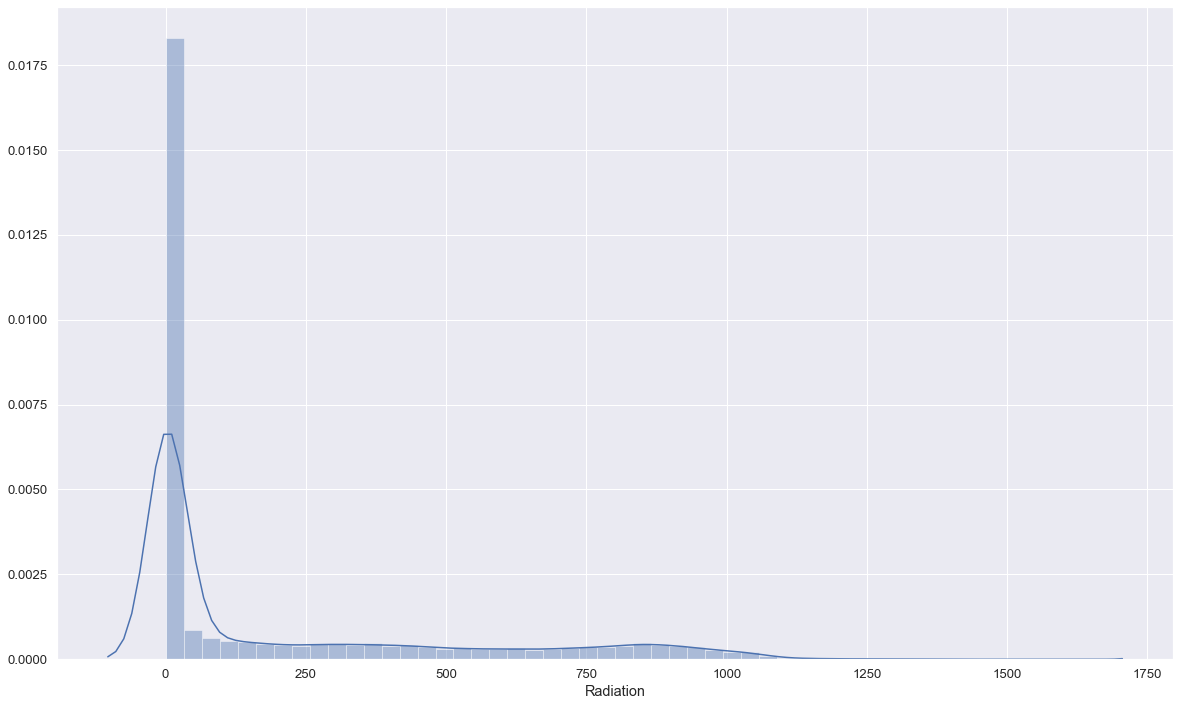

In [15]:
sns.distplot(df['Radiation'])

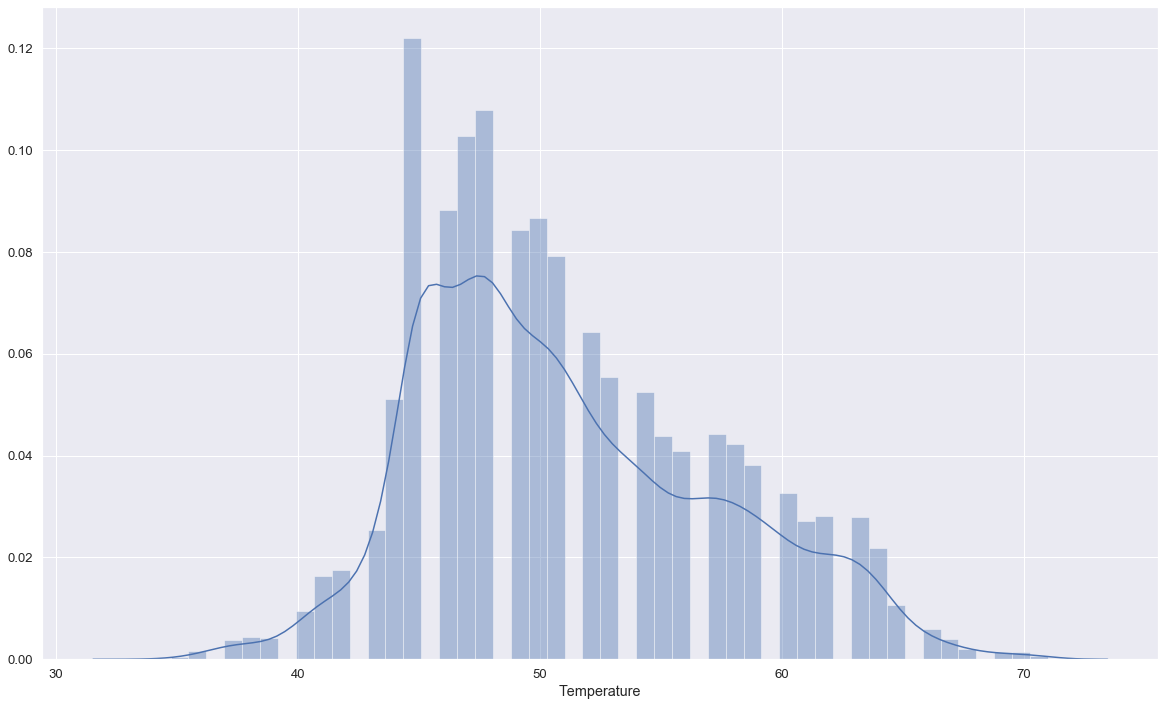

In [16]:
sns.distplot(df['Temperature'])

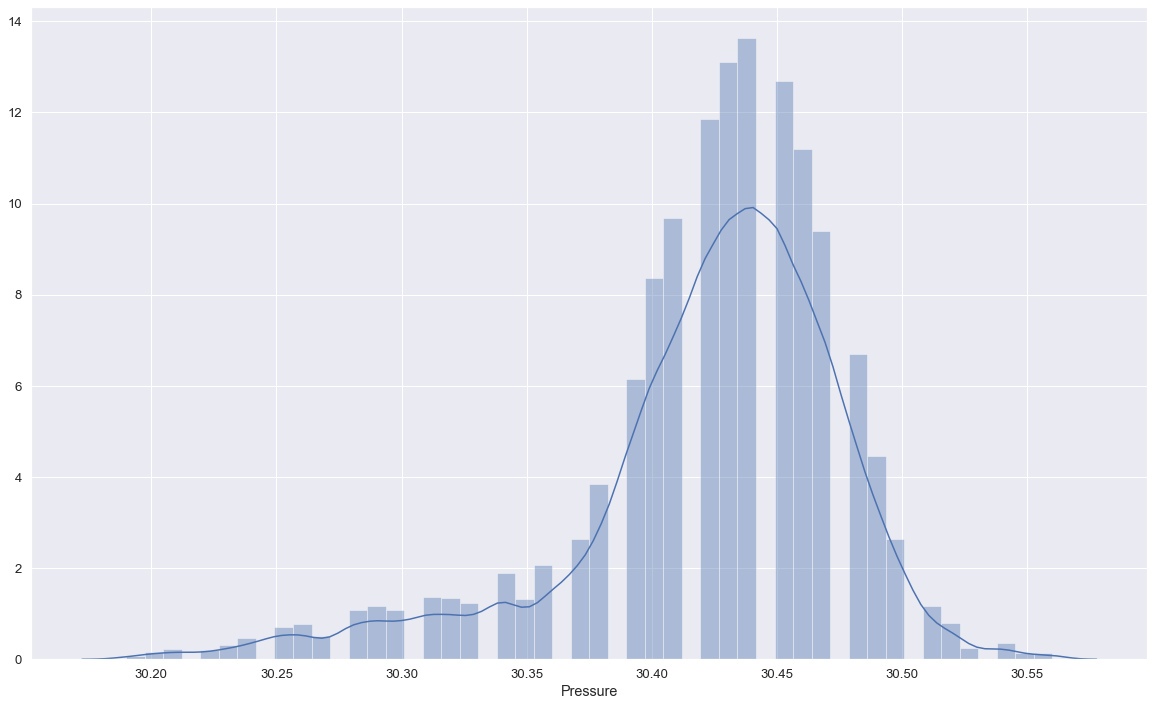

In [17]:
sns.distplot(df['Pressure'])

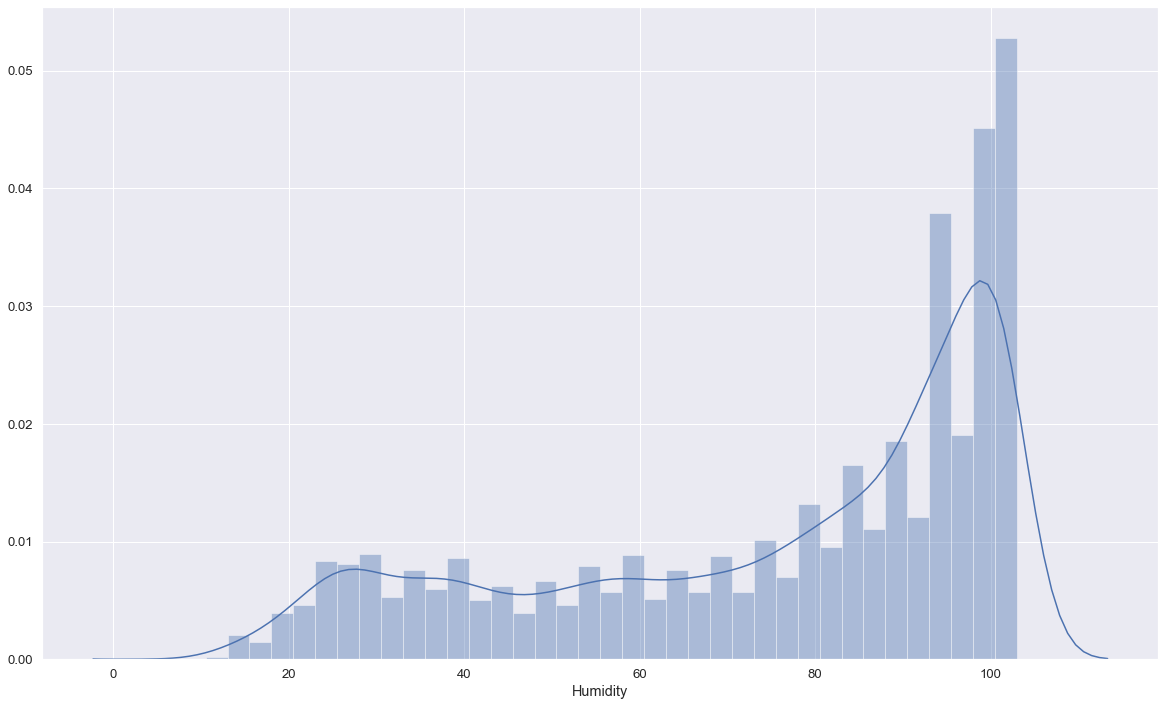

In [18]:
sns.distplot(df['Humidity'])

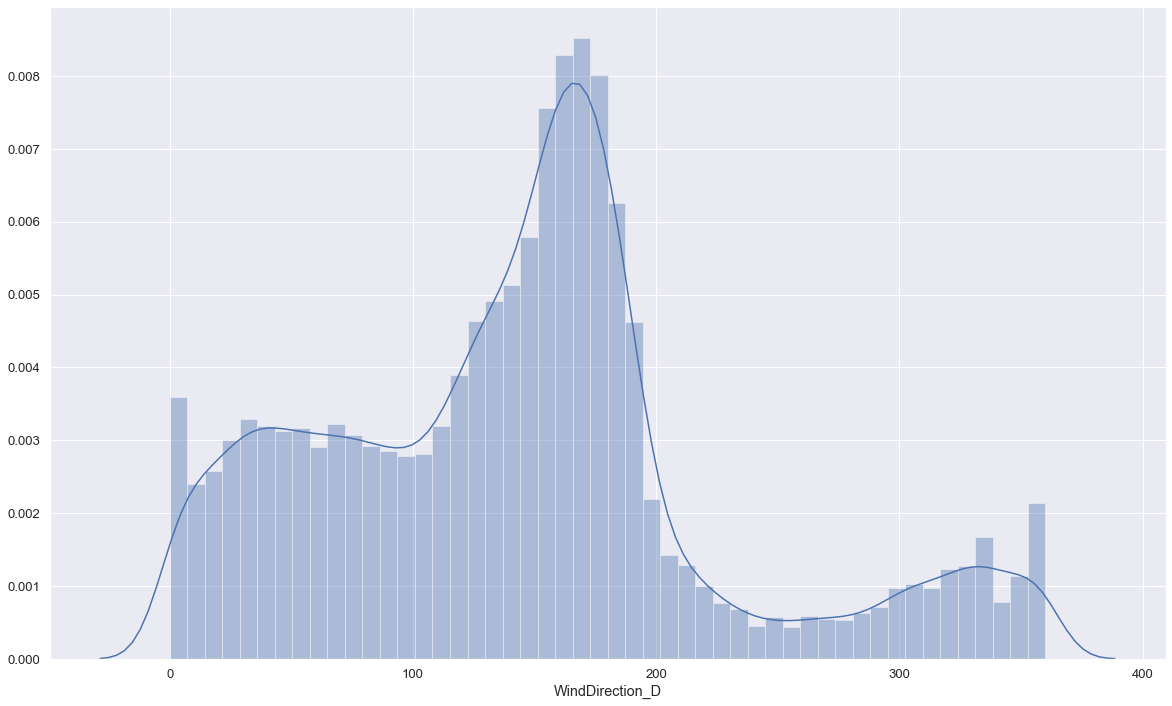

In [19]:
sns.distplot(df['WindDirection_D'])

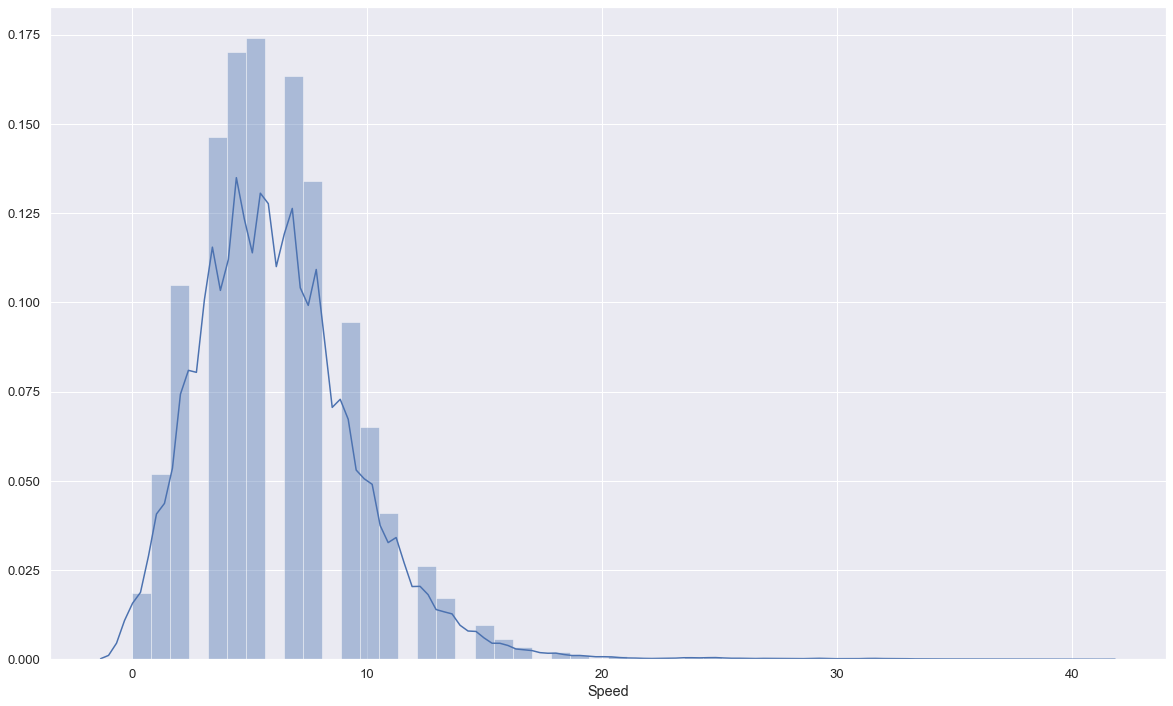

In [20]:
sns.distplot(df['Speed'])

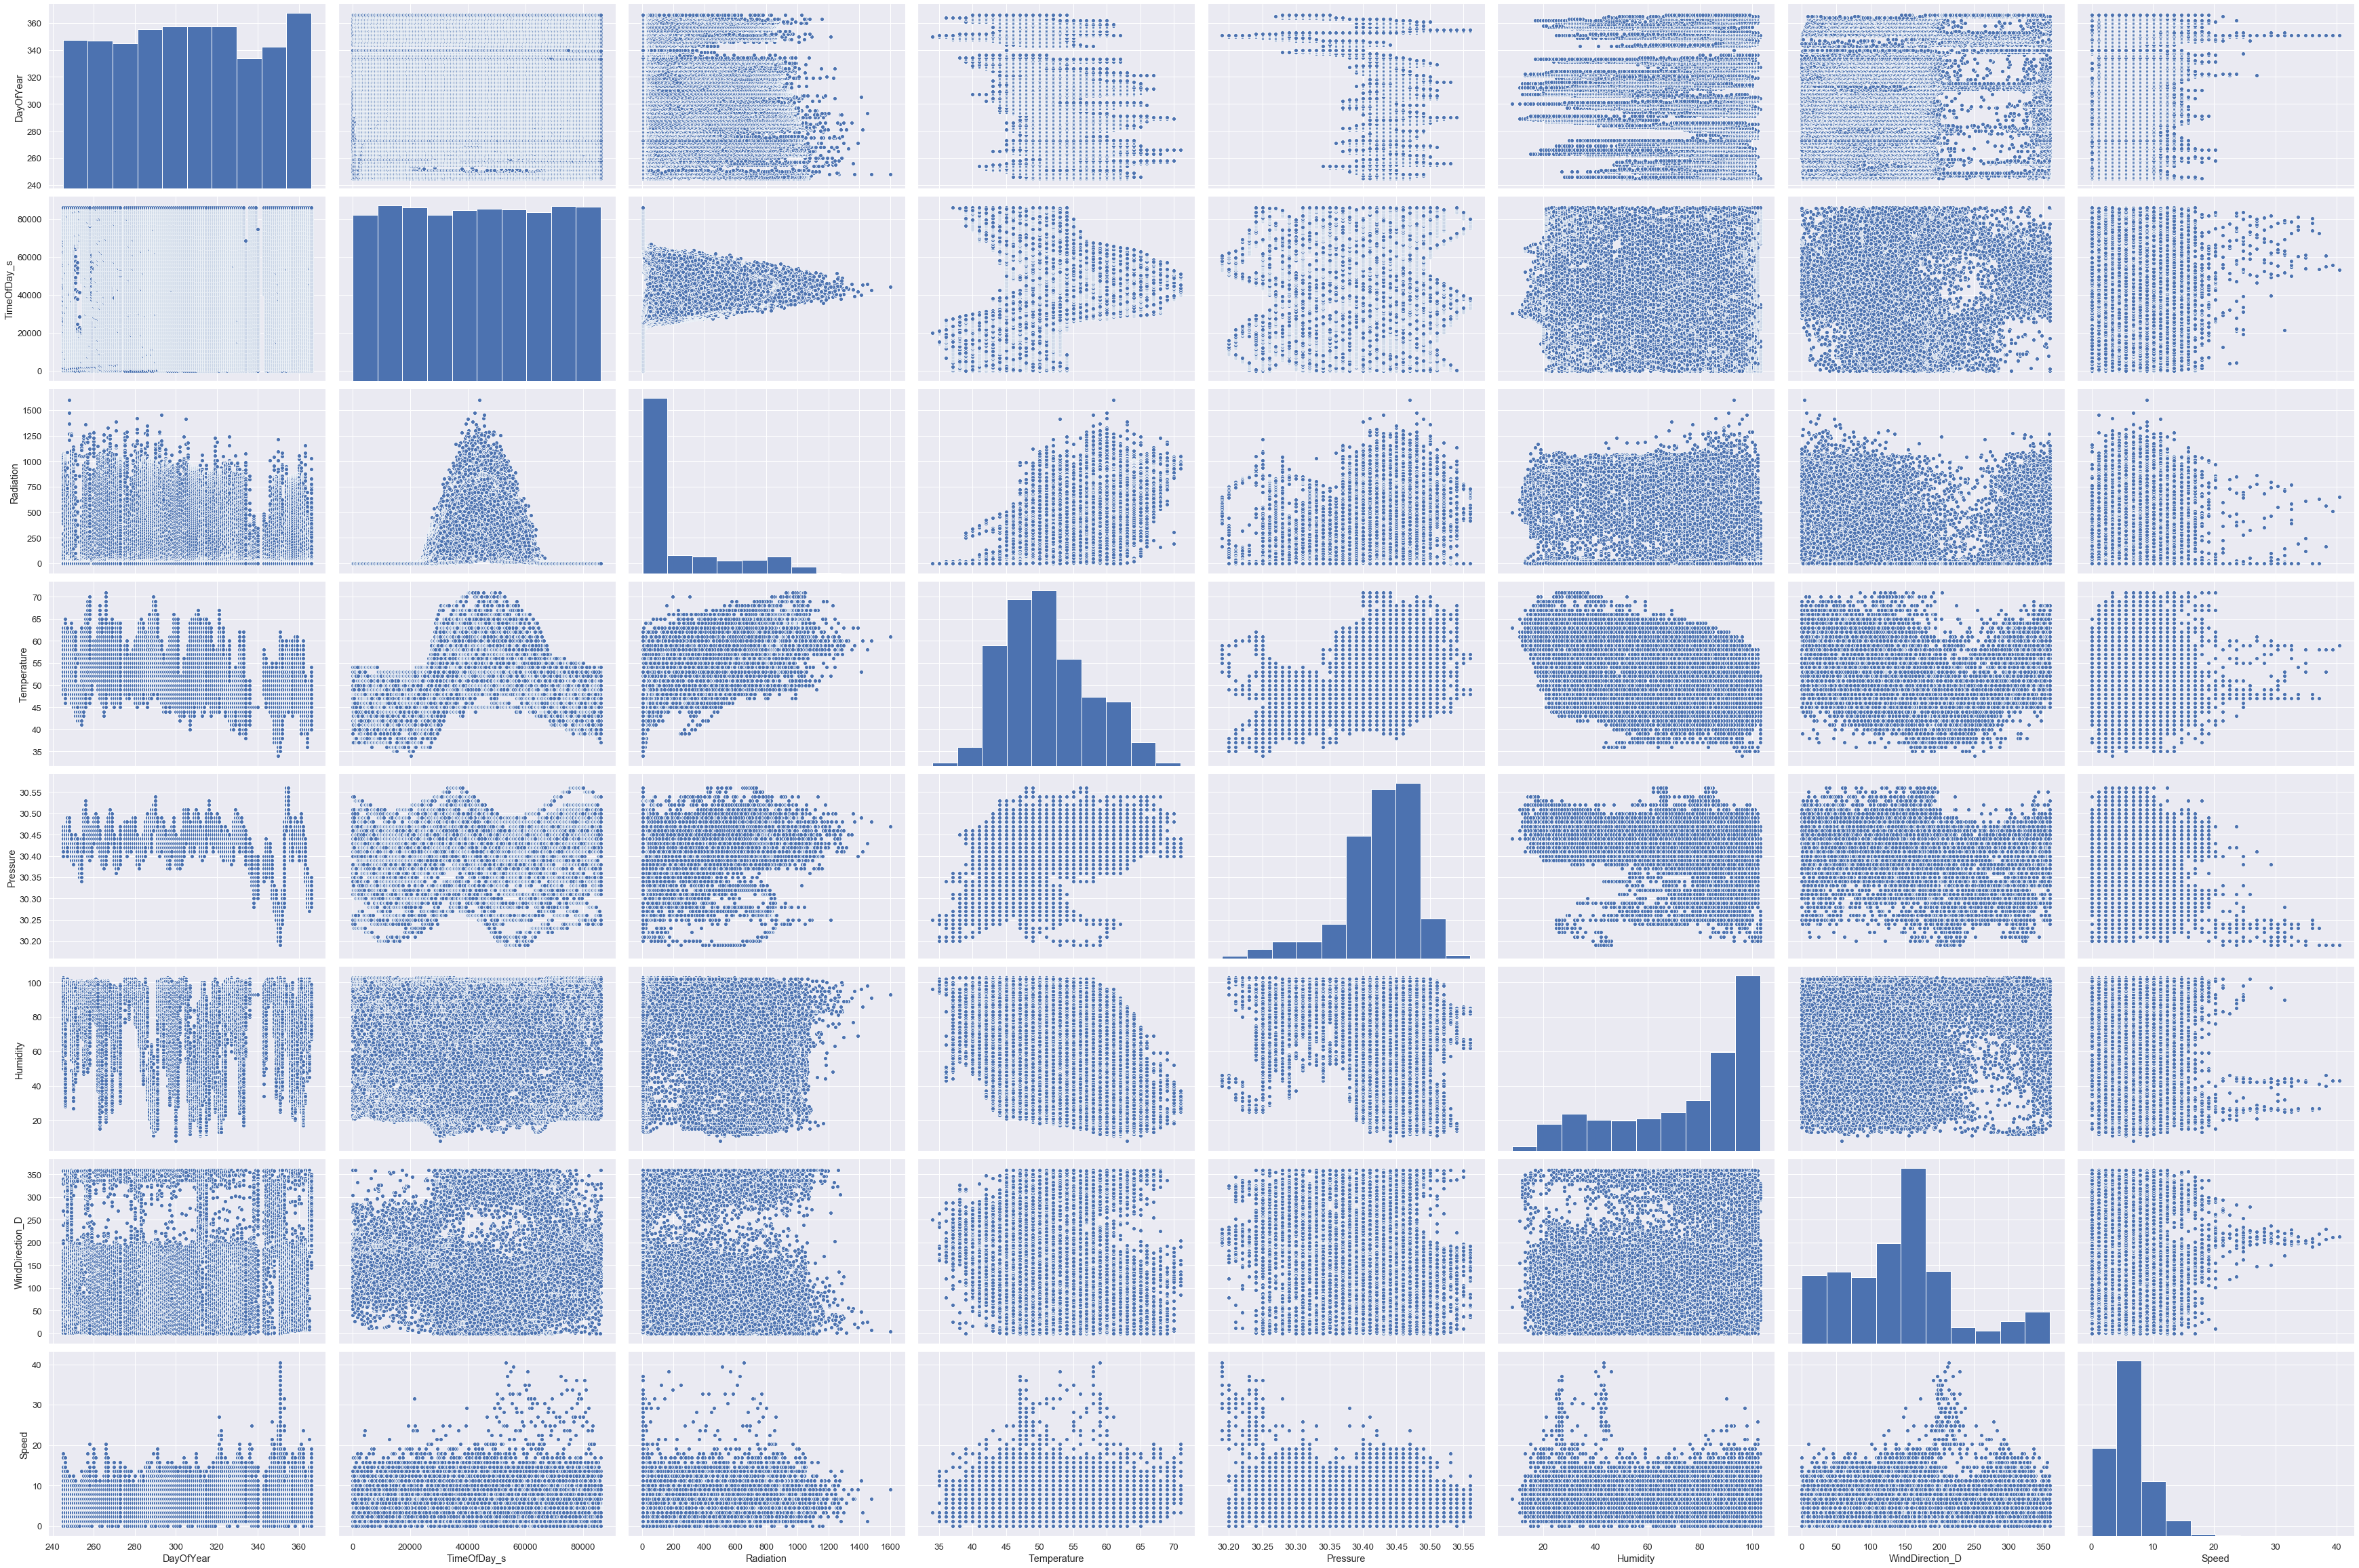

In [22]:
sns.pairplot(df, vars=[ 'DayOfYear','TimeOfDay_s', 'Radiation','Temperature', 'Pressure', 'Humidity',
                        'WindDirection_D','Speed'], height=4, aspect=1.5)

In [23]:
# Matrix form for correlation data
df.corr()

Year     Month       Day  DayOfYear  TimeOfDay_s  \
Year              NaN       NaN       NaN        NaN          NaN   
Month             NaN  1.000000  0.038027   0.968255    -0.005270   
Day               NaN  0.038027  1.000000   0.286516    -0.007966   
DayOfYear         NaN  0.968255  0.286516   1.000000    -0.007094   
TimeOfDay_s       NaN -0.005270 -0.007966  -0.007094     1.000000   
DayLength_s       NaN -0.954596 -0.252531  -0.978641     0.007896   
Radiation         NaN -0.095450  0.039978  -0.081320     0.004348   
Temperature       NaN -0.354560 -0.123705  -0.370794     0.197227   
Pressure          NaN -0.341759 -0.024633  -0.332762     0.091066   
Humidity          NaN -0.068854  0.014637  -0.063760     0.077851   
WindDirection_D   NaN  0.181485 -0.082354   0.153255    -0.077956   
Speed             NaN  0.150822  0.117337   0.174336    -0.057908   
Hour(h)           NaN -0.005396 -0.008010  -0.007223     0.999134   
Minute(m)         NaN  0.000168 -0.000196   0.000095     0.037562   
Second(s)         NaN  0.220563  0.089078   0.230957     0.004821   

                 DayLength_s  Radiation  Temperature  Pressure  Humidity  \
Year                     NaN        NaN          NaN       NaN       NaN   
Month              -0.954596  -0.095450    -0.354560 -0.341759 -0.068854   
Day                -0.252531   0.039978    -0.123705 -0.024633  0.014637   
DayOfYear          -0.978641  -0.081320    -0.370794 -0.332762 -0.063760   
TimeOfDay_s         0.007896   0.004348     0.197227  0.091066  0.077851   
DayLength_s         1.000000   0.073456     0.355509  0.278614  0.087356   
Radiation           0.073456   1.000000     0.734955  0.119016 -0.226171   
Temperature         0.355509   0.734955     1.000000  0.311173 -0.285055   
Pressure            0.278614   0.119016     0.311173  1.000000 -0.223973   
Humidity            0.087356  -0.226171    -0.285055 -0.223973  1.000000   
WindDirection_D    -0.129434  -0.230324    -0.259421 -0.229010 -0.001833   
Speed              -0.174944   0.073627    -0.031458 -0.083639 -0.211624   
Hour(h)             0.007993   0.004398     0.197464  0.091069  0.077899   
Minute(m)          -0.000093  -0.000730    -0.001934  0.001860  0.000499   
Second(s)          -0.168378  -0.031270    -0.036147 -0.031102 -0.027682   

                 WindDirection_D     Speed   Hour(h)  Minute(m)  Second(s)  
Year                         NaN       NaN       NaN        NaN        NaN  
Month                   0.181485  0.150822 -0.005396   0.000168   0.220563  
Day                    -0.082354  0.117337 -0.008010  -0.000196   0.089078  
DayOfYear               0.153255  0.174336 -0.007223   0.000095   0.230957  
TimeOfDay_s            -0.077956 -0.057908  0.999134   0.037562   0.004821  
DayLength_s            -0.129434 -0.174944  0.007993  -0.000093  -0.168378  
Radiation              -0.230324  0.073627  0.004398  -0.000730  -0.031270  
Temperature            -0.259421 -0.031458  0.197464  -0.001934  -0.036147  
Pressure               -0.229010 -0.083639  0.091069   0.001860  -0.031102  
Humidity               -0.001833 -0.211624  0.077899   0.000499  -0.027682  
WindDirection_D         1.000000  0.073092 -0.077969  -0.000602  -0.032568  
Speed                   0.073092  1.000000 -0.057939   0.000192  -0.032934  
Hour(h)                -0.077969 -0.057939  1.000000  -0.004052   0.004199  
Minute(m)              -0.000602  0.000192 -0.004052   1.000000   0.002517  
Second(s)              -0.032568 -0.032934  0.004199   0.002517   1.000000

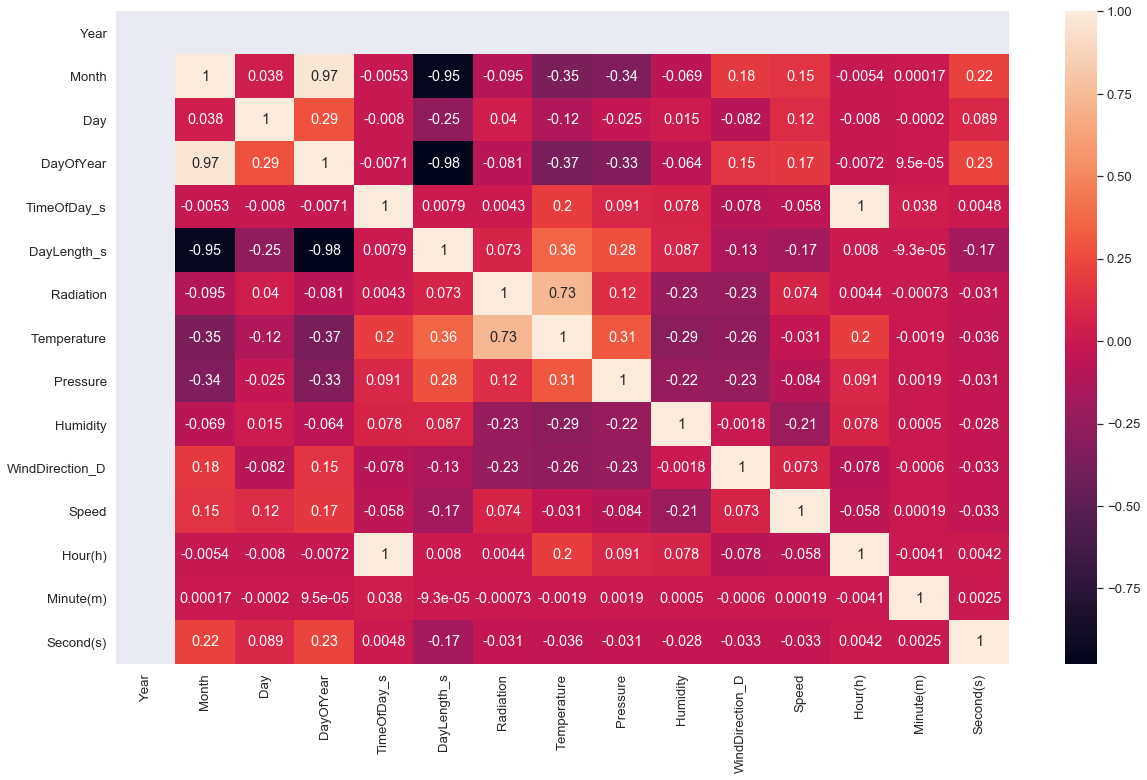

In [24]:
sns.heatmap(df.corr(), annot=True)

## From Heat Map, We Get That There are Relation Between:
- Humidity & Radiation. 
- Temeperature & Radiation.


--------

## `IMPORTANT_NOTE`

In [25]:
df1=df.copy() #For dealing with outliers

In [26]:
df2=df.copy() #For dealing without do anything to the outliers

-------------------
# The Solution `With Dealing with the Outliers`



##  Working with The Outliers
-----------------------------------------


In [27]:
df1.columns

Index(['Year', 'Month', 'Day', 'DayOfYear', 'TimeOfDay_s', 'DayLength_s',
       'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D',
       'Speed', 'Hour(h)', 'Minute(m)', 'Second(s)'],
      dtype='object')

In [28]:
check_columns=['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection_D', 'Speed']

### Vasualize the Outliers

['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed']


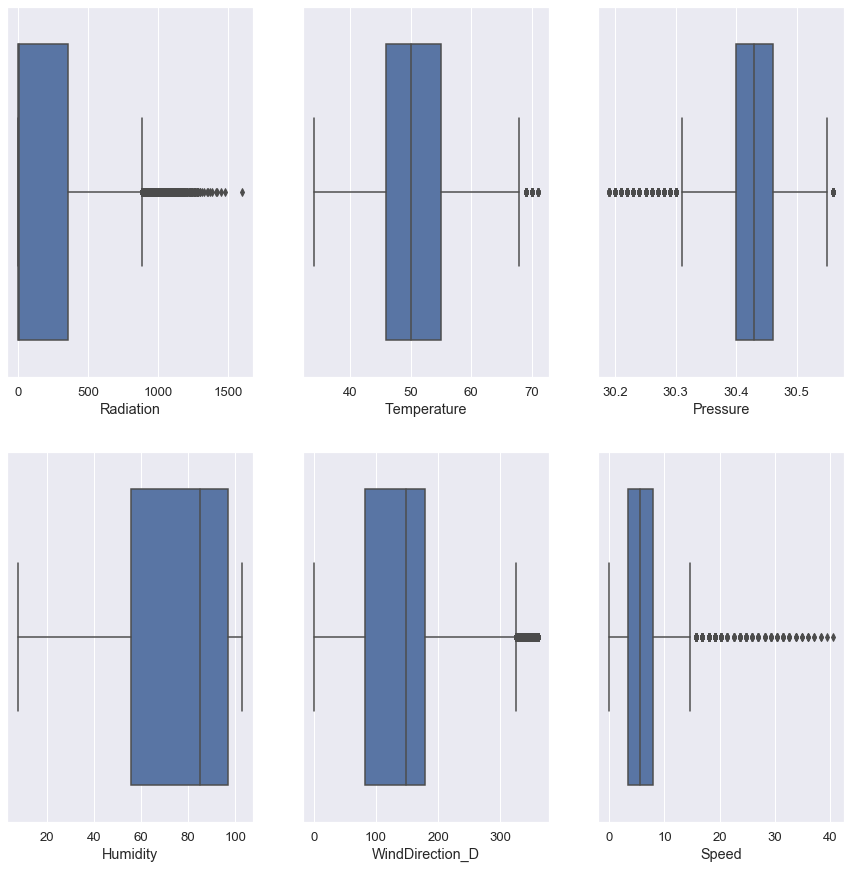

In [29]:
num_of_rows = 2
num_of_cols = 3
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(check_columns)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df1[check_columns[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

#### As You see there are a lot of outliers, that should be removed as below

### Remove the Outliers

#### First Step by datasist Library

In [30]:
for col in check_columns:
    outliers_indices = ds.structdata.detect_outliers(df1, 0, [col])
    col_median = df1[col].median()
    df1[col].iloc[outliers_indices] = col_median

#### Visualize Again

['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed']


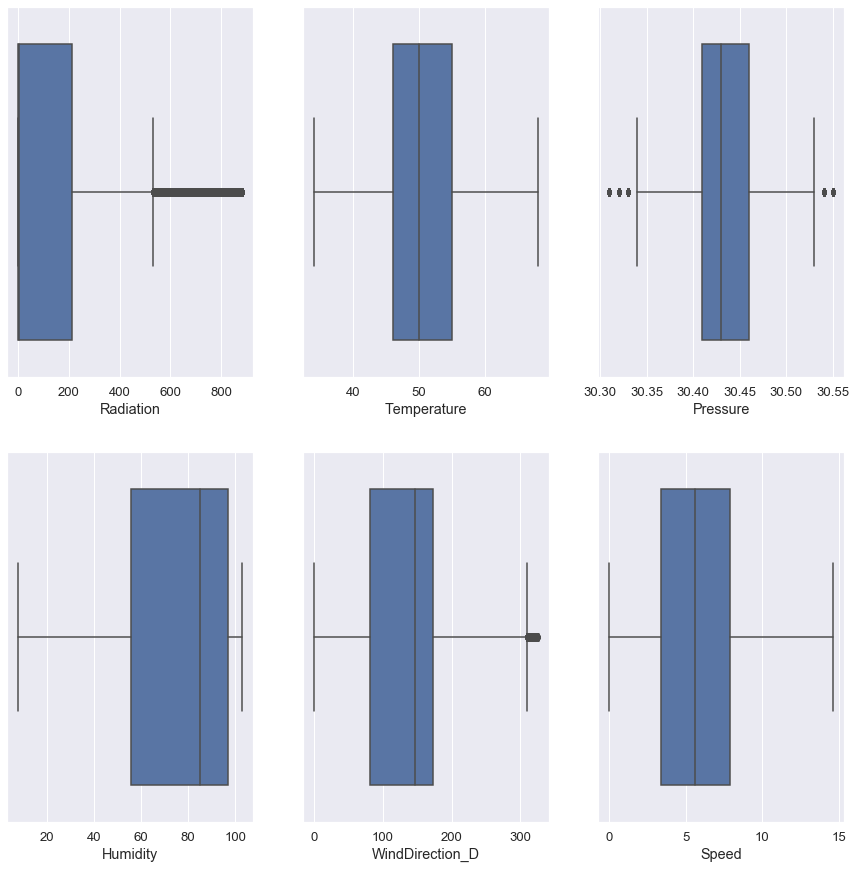

In [31]:
num_of_rows = 2
num_of_cols = 3
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(check_columns)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df1[check_columns[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

# 4- Data Preprocessing


## Train Model for Using ML `Supervised Regression Models`
------------------------

In [32]:
from sklearn.model_selection import train_test_split


x = df1[['Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed', 'DayOfYear','TimeOfDay_s']]
y = df1['Radiation']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



## `Model 1  (Linear Regression)`

In [33]:
from sklearn.linear_model import LinearRegression
ModeL1_1 = LinearRegression()
ModeL1_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred1_1 = ModeL1_1.predict(x_test)
y_pred1_1

array([164.79400422,  87.63031578, 180.04324514, ...,  93.16371011,
       348.67373234, 336.61146391])

In [35]:
y_test

30126      1.20
8209       1.26
5454       1.23
7297       2.66
3967     247.31
          ...  
15984      1.20
7788     274.04
13153      1.65
8968     437.37
9270       2.66
Name: Radiation, Length: 9806, dtype: float64

### `Calculate R2 Score`

In [36]:
ModeL1_1.score(x_train, y_train)

0.39414064462044374

In [37]:
ModeL1_1.score(x_test, y_test)

0.38654693991389266

### `Calculate Root Mean Square Error`

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred1_1))

196.08641001988065

### `Test Model on custom data`

In [40]:
#ModeL1_1.predict([[34, 12, 39, 4]])

### `Get Model Parameters`

In [41]:
ModeL1_1.coef_

array([ 2.75984896e+01, -9.26724012e+00,  6.84850849e-01, -2.71432656e-01,
        2.43309516e+00,  2.12908880e+00, -1.45512771e-03])

In [42]:
ModeL1_1.intercept_

-1596.7496874334636

In [43]:
pd.DataFrame(ModeL1_1.coef_, x.columns, columns=["Coeff"])

Coeff
Temperature      27.598490
Pressure         -9.267240
Humidity          0.684851
WindDirection_D  -0.271433
Speed             2.433095
DayOfYear         2.129089
TimeOfDay_s      -0.001455

____________________________________________

## `Model 2  (RandomForestRegression)`

### This Model From  <a href="https://levelup.gitconnected.com/random-forest-regression-209c0f354c84" target="_blank">`This Link`</a>.



In [44]:
from sklearn.ensemble import RandomForestRegressor
ModeL2_1 = RandomForestRegressor()
ModeL2_1.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred2_1= ModeL2_1.predict(x_test)
y_pred2_1

array([  1.2262,   1.2469,   1.2414, ...,   1.7932, 388.6144, 347.3056])

In [46]:
y_test

30126      1.20
8209       1.26
5454       1.23
7297       2.66
3967     247.31
          ...  
15984      1.20
7788     274.04
13153      1.65
8968     437.37
9270       2.66
Name: Radiation, Length: 9806, dtype: float64

### `Calculate R2 Score`

In [47]:
ModeL2_1.score(x_train, y_train)

0.9792947537767798

In [48]:
ModeL2_1.score(x_test, y_test)

0.8432975428449886

### `Calculate Root Mean Square Error`

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred2_1))

99.10480927632919

### `Test Model on custom data`

In [50]:
#ModeL2_1.predict([[34, 12, 39, 4]])

## `R2 Score for Two Models`

In [51]:
from sklearn.metrics import r2_score
print('LinearRegression:',r2_score(y_test, y_pred1_1))
print('RandomForestRegressor:',r2_score(y_test, y_pred2_1))

LinearRegression: 0.38654693991389266
RandomForestRegressor: 0.8432975428449886


----------------------

-------------------
# The Solution `Without Dealing with the Outliers`

In [52]:
df2

Year  Month  Day  DayOfYear  TimeOfDay_s  DayLength_s  Radiation  \
0      2016      9    1        245            8        45060       2.58   
1      2016      9    1        245          310        45060       2.83   
2      2016      9    1        245         1206        45060       2.16   
3      2016      9    1        245         1505        45060       2.21   
4      2016      9    1        245         1809        45060       2.25   
...     ...    ...  ...        ...          ...          ...        ...   
32681  2016     12   31        366        84902        39420       1.22   
32682  2016     12   31        366        85201        39420       1.21   
32683  2016     12   31        366        85504        39420       1.21   
32684  2016     12   31        366        85803        39420       1.19   
32685  2016     12   31        366        86101        39420       1.21   

       Temperature  Pressure  Humidity  WindDirection_D  Speed  Hour(h)  \
0               51     30.43       103            77.27  11.25        0   
1               51     30.43       103           153.44   9.00        0   
2               51     30.43       103           142.04   7.87        0   
3               51     30.43       103           144.12  18.00        0   
4               51     30.43       103            67.42  11.25        0   
...            ...       ...       ...              ...    ...      ...   
32681           41     30.34        83           238.94   6.75       23   
32682           41     30.34        82           236.79   5.62       23   
32683           42     30.34        81           218.28   7.87       23   
32684           41     30.34        80           215.23   7.87       23   
32685           41     30.34        81           215.56   9.00       23   

       Minute(m)  Second(s)  
0              0          8  
1              5         10  
2             20          6  
3             25          5  
4             30          9  
...          ...        ...  
32681         35          2  
32682         40          1  
32683         45          4  
32684         50          3  
32685         55          1  

[32686 rows x 15 columns]

In [53]:
df2.Radiation.value_counts()

1.22      2264
1.23      2110
1.21      2010
1.24      1725
1.20      1558
          ... 
21.19        1
339.93       1
418.07       1
40.69        1
734.67       1
Name: Radiation, Length: 14434, dtype: int64

In [54]:
df2.loc[df['Radiation']>490]

Year  Month  Day  DayOfYear  TimeOfDay_s  DayLength_s  Radiation  \
86     2016      9    1        245        30007        45060     555.78   
87     2016      9    1        245        30304        45060     587.37   
89     2016      9    1        245        30906        45060     633.24   
92     2016      9    1        245        32411        45060     786.81   
93     2016      9    1        245        32708        45060     708.67   
...     ...    ...  ...        ...          ...          ...        ...   
32575  2016     12   31        366        53101        39420     637.19   
32579  2016     12   31        366        54302        39420     586.51   
32583  2016     12   31        366        55502        39420     778.69   
32588  2016     12   31        366        57001        39420     594.78   
32590  2016     12   31        366        57602        39420     552.33   

       Temperature  Pressure  Humidity  WindDirection_D  Speed  Hour(h)  \
86              53     30.45        82           107.81  12.37        8   
87              53     30.45        78           204.79   3.37        8   
89              53     30.45        72           133.06  10.12        8   
92              54     30.46        69           105.07   9.00        9   
93              55     30.46        69            76.68   5.62        9   
...            ...       ...       ...              ...    ...      ...   
32575           52     30.28        86           316.74  15.75       14   
32579           52     30.28        87           326.32  11.25       15   
32583           53     30.29        83           332.81  12.37       15   
32588           54     30.28        73           320.86  13.50       15   
32590           54     30.28        77           328.53   9.00       16   

       Minute(m)  Second(s)  
86            20          7  
87            25          4  
89            35          6  
92             0         11  
93             5          8  
...          ...        ...  
32575         45          1  
32579          5          2  
32583         25          2  
32588         50          1  
32590          0          2  

[6375 rows x 15 columns]

## 4- Data Preprocessing


## Train Model for Using ML `Supervised Regression Models`
------------------------

In [55]:
from sklearn.model_selection import train_test_split


x = df2[['Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed', 'DayOfYear','TimeOfDay_s']]
y = df2['Radiation']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



## `Model 1  (Linear Regression)`

In [56]:
from sklearn.linear_model import LinearRegression
ModeL1_2 = LinearRegression()
ModeL1_2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred1_2 = ModeL1_2.predict(x_test)
y_pred1_2

array([ 53.24301789, 278.81634198, 134.1945547 , ..., 303.40316267,
       627.49729129, 174.37279527])

In [58]:
y_test

13702      1.25
7607     108.29
25678      1.22
12023    395.28
24984    153.76
          ...  
28079      1.23
10140    523.17
29732     29.90
19001    239.87
3713       1.25
Name: Radiation, Length: 9806, dtype: float64

### `Calculate R2 Score`

In [59]:
ModeL1_2.score(x_train, y_train)

0.619888401025346

In [60]:
ModeL1_2.score(x_test, y_test)

0.6214590397524296

### `Calculate Root Mean Square Error`

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
np.sqrt(mean_squared_error(y_test, y_pred1_2))

191.5036096823019

### `Test Model on custom data`

In [63]:
#ModeL1_2.predict([[34, 12, 39, 4]])

### `Get Model Parameters`

In [64]:
ModeL1_2.coef_

array([ 4.41373236e+01, -3.29575960e+02,  6.00665720e-01, -2.74927605e-01,
        5.90474770e+00,  2.00450864e+00, -2.12327485e-03])

In [65]:
ModeL1_2.intercept_

7414.969586447207

In [66]:
pd.DataFrame(ModeL1_2.coef_, x.columns, columns=["Coeff"])

Coeff
Temperature       44.137324
Pressure        -329.575960
Humidity           0.600666
WindDirection_D   -0.274928
Speed              5.904748
DayOfYear          2.004509
TimeOfDay_s       -0.002123

____________________________________________

## `Model 2  (RandomForestRegression)`

### This Model From  <a href="https://levelup.gitconnected.com/random-forest-regression-209c0f354c84" target="_blank">`This Link`</a>.



In [67]:
from sklearn.ensemble import RandomForestRegressor
ModeL2_2 = RandomForestRegressor()
ModeL2_2.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
y_pred2_2= ModeL2_2.predict(x_test)
y_pred2_2

array([  1.2103, 150.6937,   1.2187, ...,  33.9602, 341.129 ,   1.2445])

In [69]:
y_test

13702      1.25
7607     108.29
25678      1.22
12023    395.28
24984    153.76
          ...  
28079      1.23
10140    523.17
29732     29.90
19001    239.87
3713       1.25
Name: Radiation, Length: 9806, dtype: float64

### `Calculate R2 Score`

In [70]:
ModeL2_2.score(x_train, y_train)

0.9904487789152432

In [71]:
ModeL2_2.score(x_test, y_test)

0.9348495829441388

### `Calculate Root Mean Square Error`

In [72]:
np.sqrt(mean_squared_error(y_test, y_pred2_2))

79.44729678568326

### `Test Model on custom data`  
{`Temperature`, `Pressure`, `Humidity`, `WindDirection_D`, `Speed`, `DayOfYear`,`TimeOfDay_s`}

In [73]:
df2[['Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed', 'DayOfYear','TimeOfDay_s','Radiation']].describe()

Temperature      Pressure      Humidity  WindDirection_D  \
count  32686.000000  32686.000000  32686.000000     32686.000000   
mean      51.103255     30.422879     75.016307       143.489821   
std        6.201157      0.054673     25.990219        83.167500   
min       34.000000     30.190000      8.000000         0.090000   
25%       46.000000     30.400000     56.000000        82.227500   
50%       50.000000     30.430000     85.000000       147.700000   
75%       55.000000     30.460000     97.000000       179.310000   
max       71.000000     30.560000    103.000000       359.950000   

              Speed     DayOfYear   TimeOfDay_s     Radiation  
count  32686.000000  32686.000000  32686.000000  32686.000000  
mean       6.243869    306.110965  43277.574068    207.124697  
std        3.490474     34.781367  24900.749819    315.916387  
min        0.000000    245.000000      1.000000      1.110000  
25%        3.370000    277.000000  21617.000000      1.230000  
50%        5.620000    306.000000  43230.000000      2.660000  
75%        7.870000    334.000000  64849.000000    354.235000  
max       40.500000    366.000000  86185.000000   1601.260000

In [74]:
round((ModeL2_2.predict([[51,30.43,103,77.27,11.25,245,8]])[0]),2)

2.49

In [75]:
round((ModeL2_2.predict([[82,31.43,110,200.5,35,50,15000]])[0]),2)

457.84

## `R2 Score for Two Models`

In [76]:
from sklearn.metrics import r2_score
print('LinearRegression:',r2_score(y_test, y_pred1_2))
print('RandomForestRegression:',r2_score(y_test, y_pred2_2))

LinearRegression: 0.6214590397524296
RandomForestRegression: 0.9348495829441388


------------

# `Conclusion `

### - As We Saw, That the `presence of the outliers` in the data, `Enhancing the accuracy of the models`.

#### - Though, `ModeL2_2`(The `RandomForestRegression Model` without Dealing with the Outliers is the `Perfect Model` for our Data)

----------------

## Save `ModeL2_2` as `Pickle_File` for Future Working for The `Deployment`

In [77]:
import joblib

In [78]:
joblib.dump(ModeL2_2, 'model.pkl')

['model.pkl']

### Usefull Links:

##### - `DayOfYear` Calculator from  <a href="https://www.free-online-calculator-use.com/day-of-year-calculator.html#" target="_blank">`This Link`</a>.
    
